# Analysis of Small MC Simulation on Stag Hunt Mixed Strategy Agent Model

In this model each agent has a mixed strategy based on their ingroup and outgroup beliefs.  If the opponent is in the ingroup the agent has a ingroup_belief chance to cooperate and a 1-ingroup_belief to defect.  Otherwise the model is the simple learning evolutionary model.

Currently plots time series of averages and variances across Monte Carlo simulations.

In [16]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

number_of_agents = 100

def mc_mean_variance(df, first, last):
    data = df.loc[:, pd.IndexSlice[:, first:last]]
    mean_within_MC_steps = data.mean(axis=1, level=0)
    mean_across_MC_steps = mean_within_MC_steps.mean(axis=1)
    variance_across_MC_steps = mean_within_MC_steps.sub(mean_across_MC_steps, axis=0).pow(2).mean(axis=1)
    return mean_across_MC_steps, variance_across_MC_steps

################## Ingroup = 0.9, Outgroup = 0.9 ####################


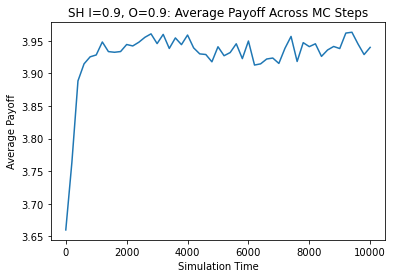

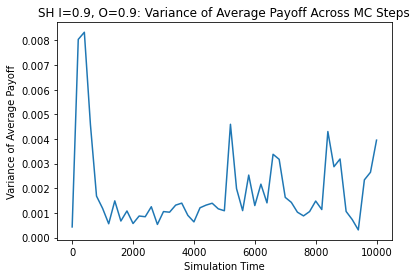

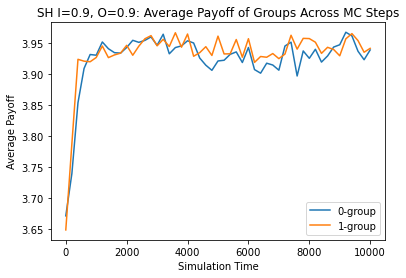

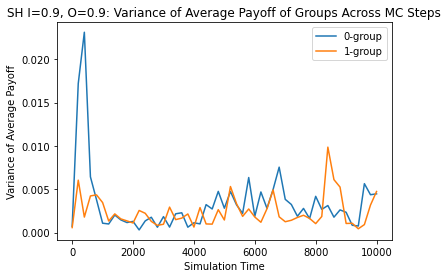

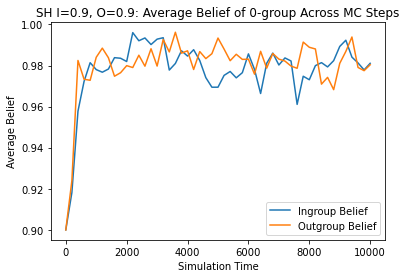

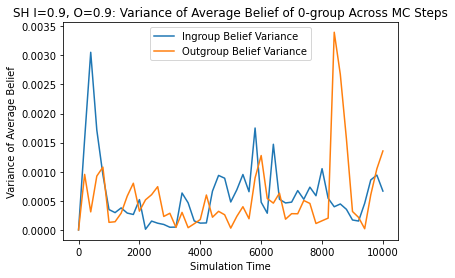

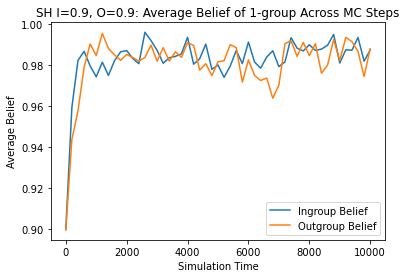

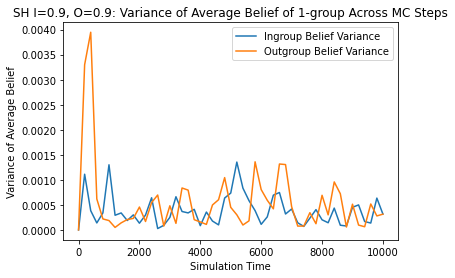

################## Ingroup = 0.9, Outgroup = 0.5 ####################


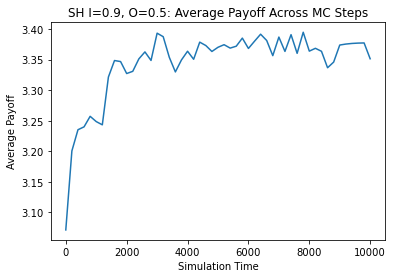

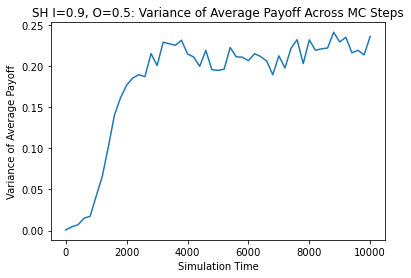

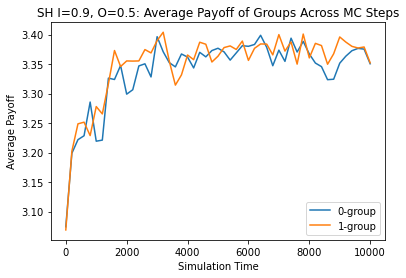

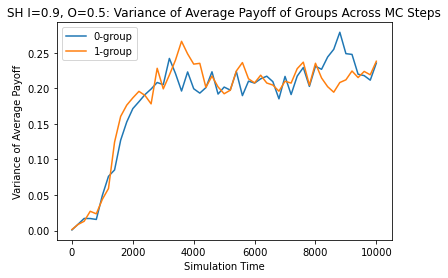

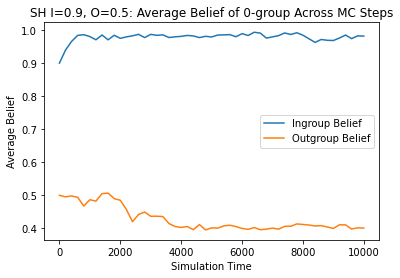

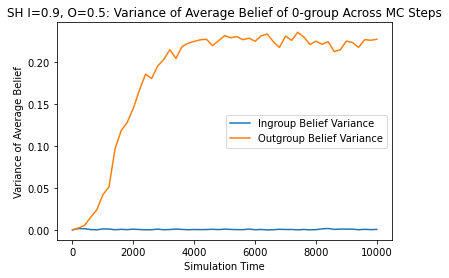

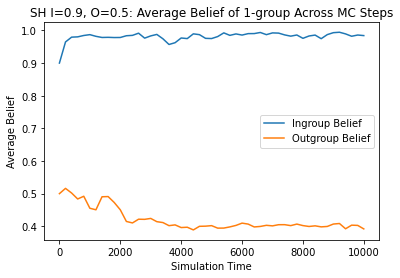

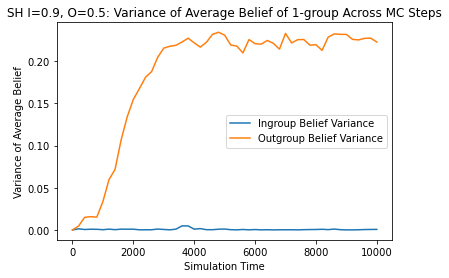

################## Ingroup = 0.9, Outgroup = 0.1 ####################


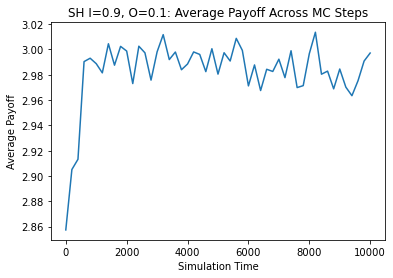

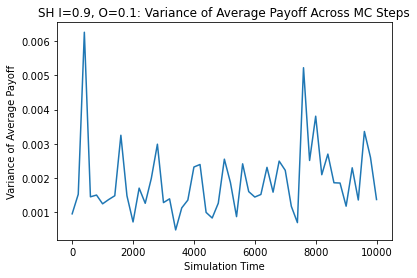

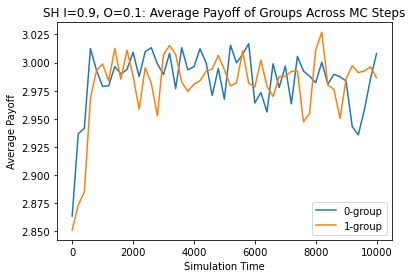

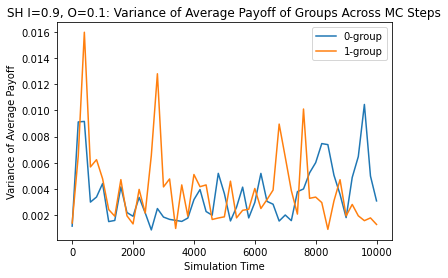

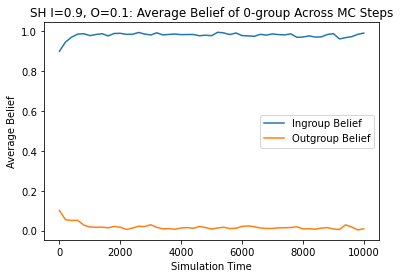

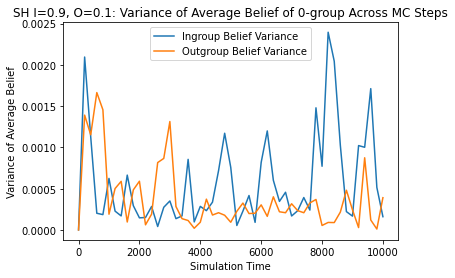

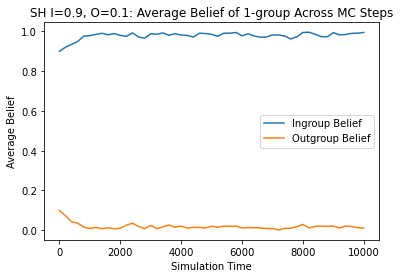

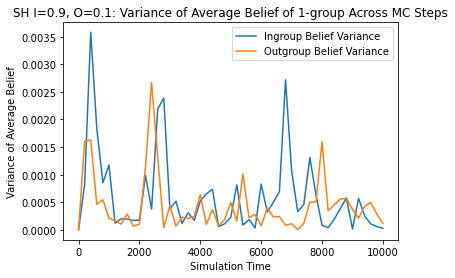

################## Ingroup = 0.5, Outgroup = 0.9 ####################


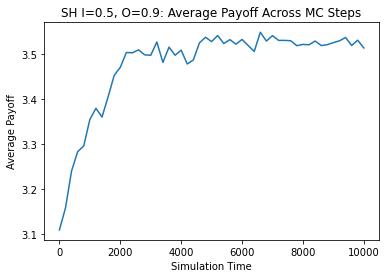

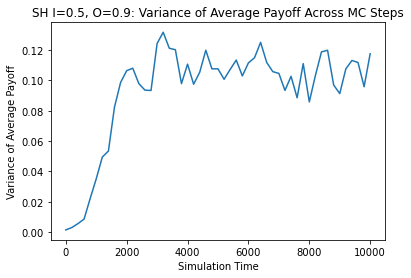

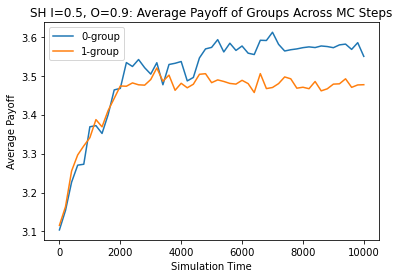

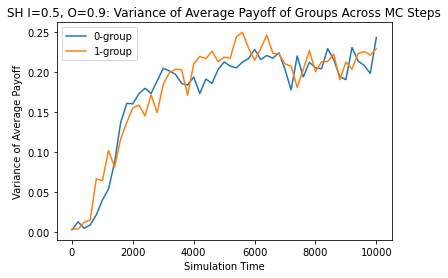

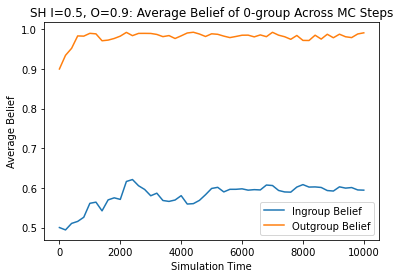

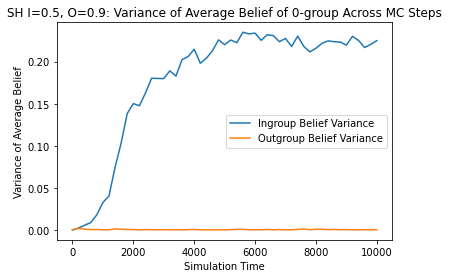

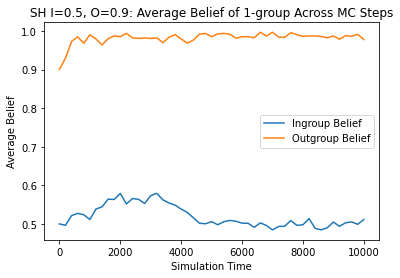

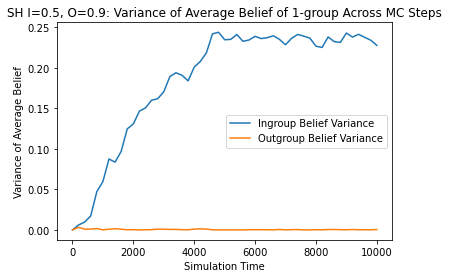

################## Ingroup = 0.5, Outgroup = 0.5 ####################


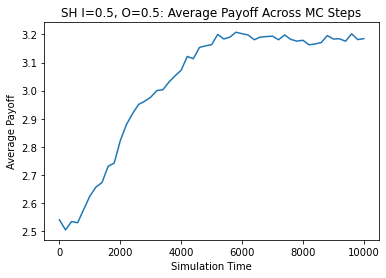

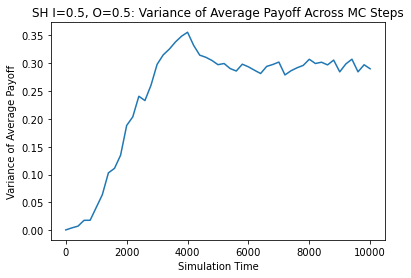

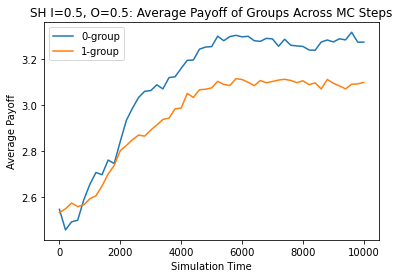

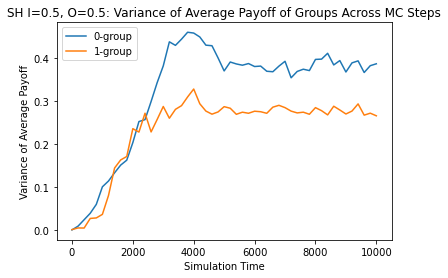

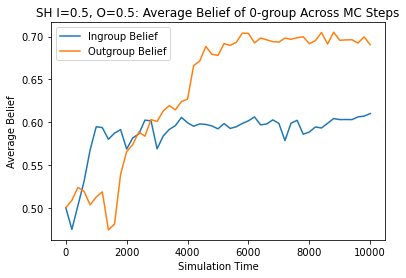

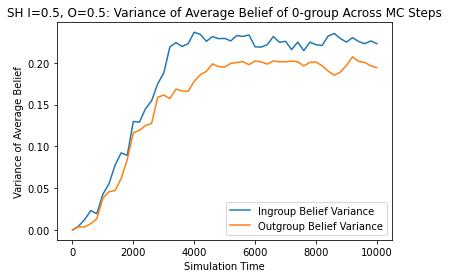

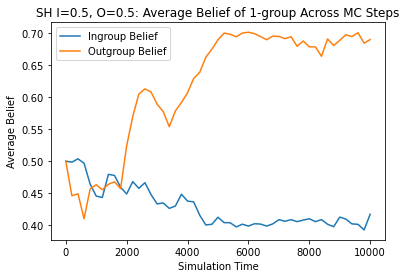

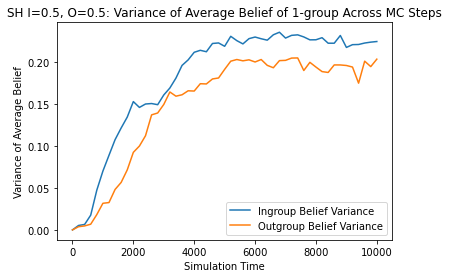

################## Ingroup = 0.5, Outgroup = 0.1 ####################


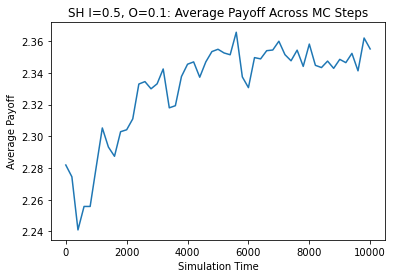

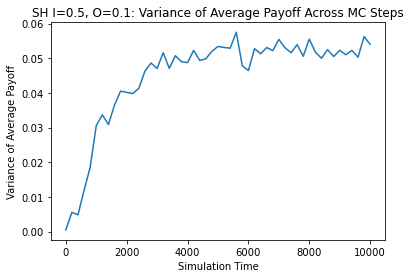

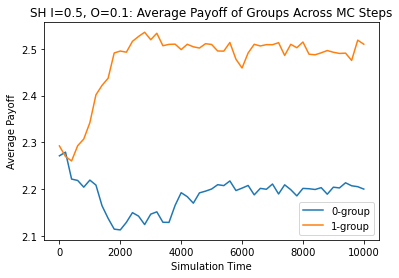

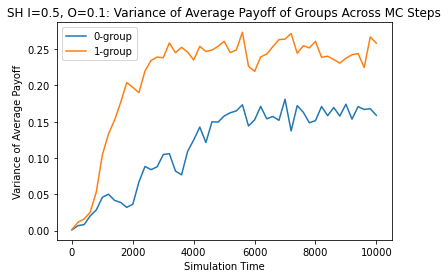

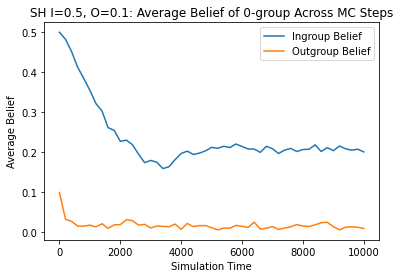

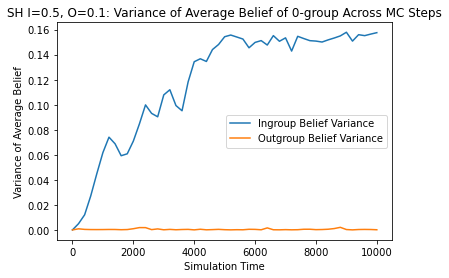

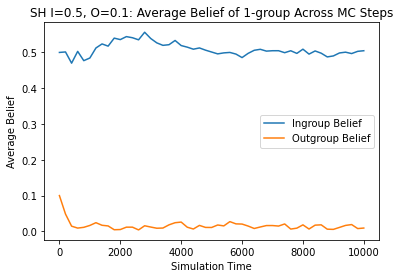

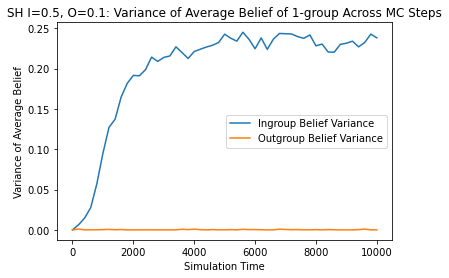

################## Ingroup = 0.1, Outgroup = 0.9 ####################


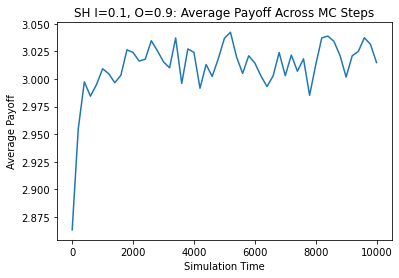

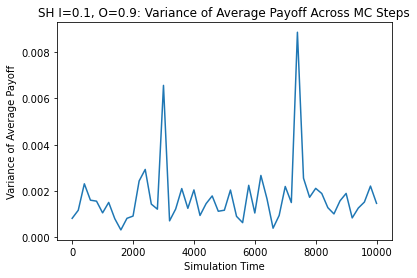

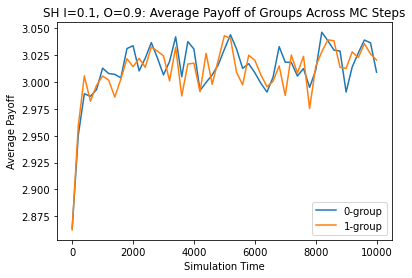

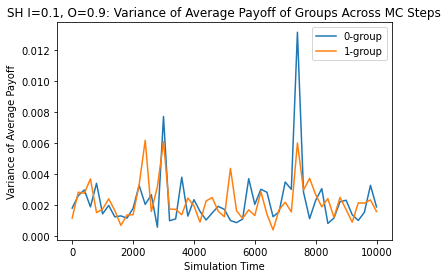

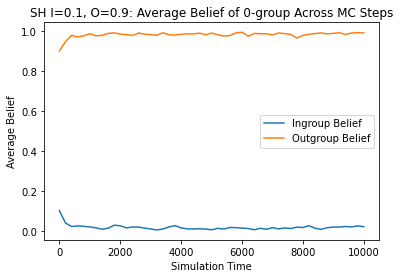

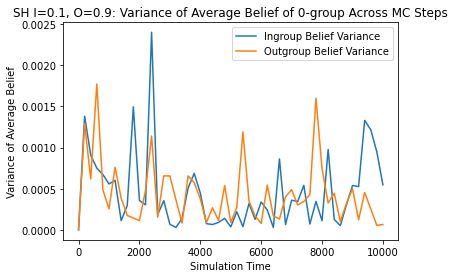

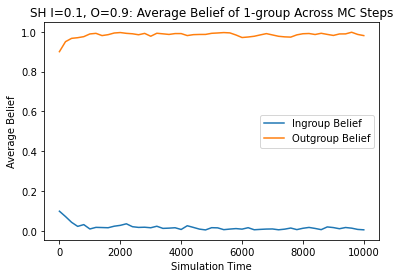

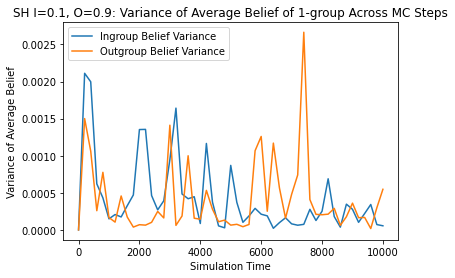

################## Ingroup = 0.1, Outgroup = 0.5 ####################


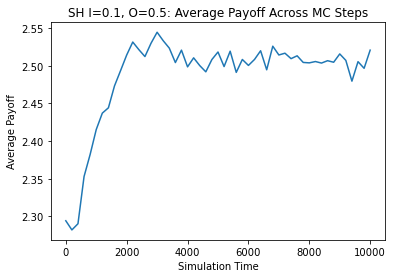

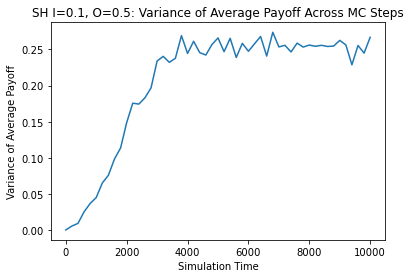

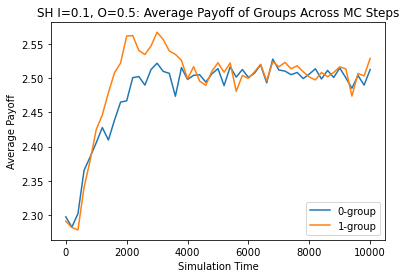

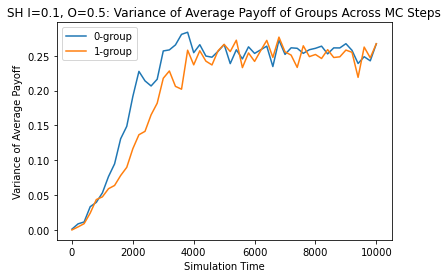

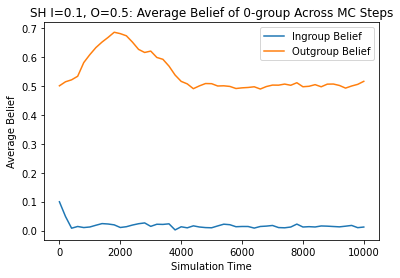

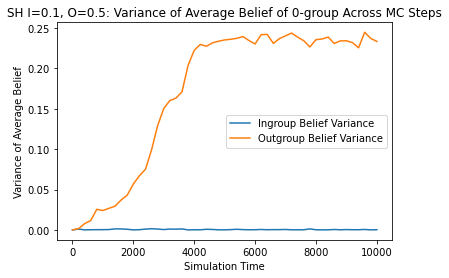

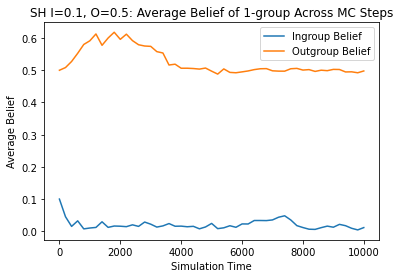

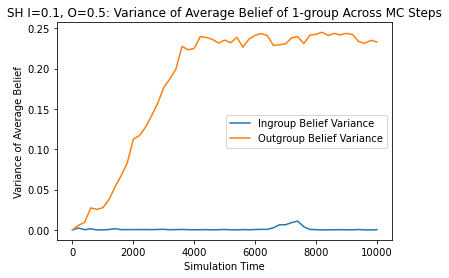

################## Ingroup = 0.1, Outgroup = 0.1 ####################


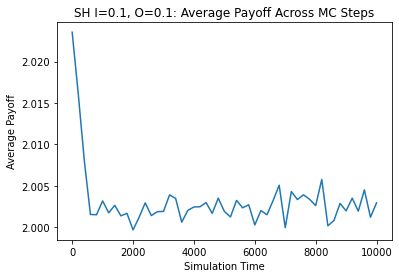

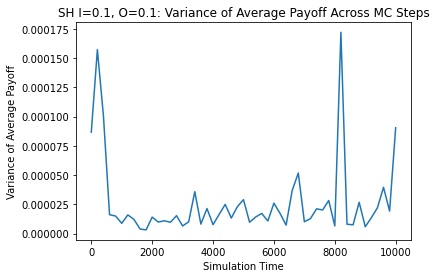

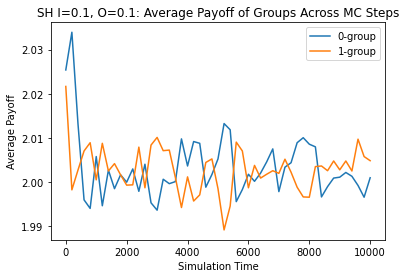

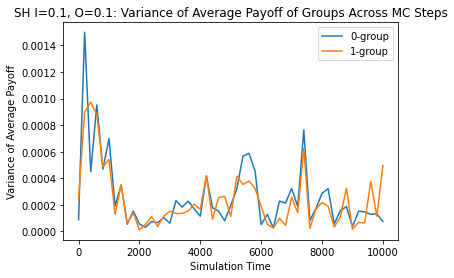

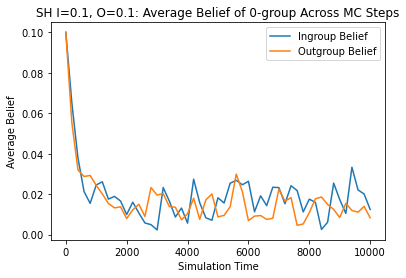

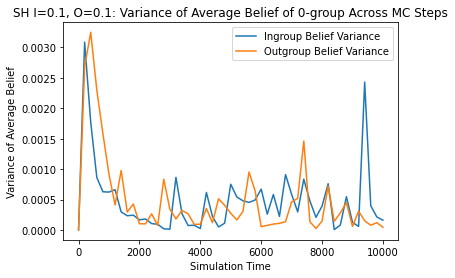

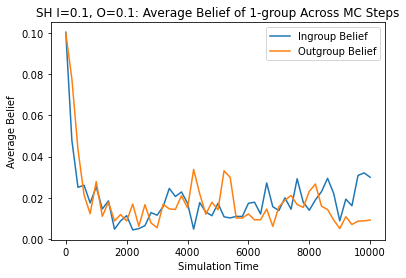

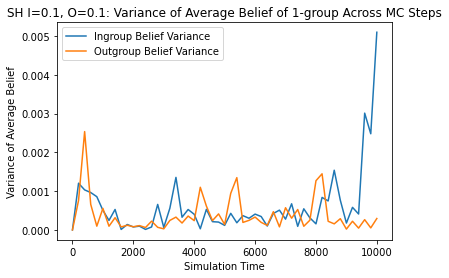

In [17]:
# Create graphs for all conditions.
beliefs = ['0.9', '0.5', '0.1']
for ingroup in beliefs:
    for outgroup in beliefs:
        dataList = []

        for datafile in glob.glob('results/*_ingroup_{}_outgroup_{}_*.csv'.format(ingroup, outgroup)):
            dataList.append(pd.read_csv(datafile))

        # Setup data frame, remove repeated timesteps and set timesteps as row names.
        df = pd.concat(dataList, axis=1, keys = range(len(dataList)))
        df.index = df.loc[:, pd.IndexSlice[2, 'T']]
        df = df.loc[:, pd.IndexSlice[:, 'P0':'O99']]
        df = df.rename_axis('T')

        mean_across_MC_steps_payoff, variance_across_MC_steps_payoff = mc_mean_variance(df, 'P0', 'P99')

        mean_across_MC_steps_0_payoff, variance_across_MC_steps_0_payoff = mc_mean_variance(df, 'P0', 'P49')
        mean_across_MC_steps_1_payoff, variance_across_MC_steps_1_payoff = mc_mean_variance(df, 'P50', 'P99')

        mean_across_MC_steps_0_ingroup, variance_across_MC_steps_0_ingroup = mc_mean_variance(df, 'I0', 'I49')
        mean_across_MC_steps_1_ingroup, variance_across_MC_steps_1_ingroup = mc_mean_variance(df, 'I50', 'I99')

        mean_across_MC_steps_0_outgroup, variance_across_MC_steps_0_outgroup = mc_mean_variance(df, 'O0', 'O49')
        mean_across_MC_steps_1_outgroup, variance_across_MC_steps_1_outgroup = mc_mean_variance(df, 'O50', 'O99')
        
        print("################## Ingroup = {}, Outgroup = {} ####################".format(ingroup, outgroup))

        plt.plot(mean_across_MC_steps_payoff)
        plt.xlabel("Simulation Time")
        plt.ylabel("Average Payoff")
        plt.title("SH I={}, O={}: Average Payoff Across MC Steps".format(ingroup, outgroup))
        plt.show()

        plt.plot(variance_across_MC_steps_payoff)
        plt.xlabel("Simulation Time")
        plt.ylabel("Variance of Average Payoff")
        plt.title("SH I={}, O={}: Variance of Average Payoff Across MC Steps".format(ingroup, outgroup))
        plt.show()

        plt.plot(mean_across_MC_steps_0_payoff, label="0-group")
        plt.plot(mean_across_MC_steps_1_payoff, label="1-group")
        plt.xlabel("Simulation Time")
        plt.ylabel("Average Payoff")
        plt.title("SH I={}, O={}: Average Payoff of Groups Across MC Steps".format(ingroup, outgroup))
        plt.legend()
        plt.show()

        plt.plot(variance_across_MC_steps_0_payoff, label="0-group")
        plt.plot(variance_across_MC_steps_1_payoff, label="1-group")
        plt.xlabel("Simulation Time")
        plt.ylabel("Variance of Average Payoff")
        plt.title("SH I={}, O={}: Variance of Average Payoff of Groups Across MC Steps".format(ingroup, outgroup))
        plt.legend()
        plt.show()

        plt.plot(mean_across_MC_steps_0_ingroup, label="Ingroup Belief")
        plt.plot(mean_across_MC_steps_0_outgroup, label="Outgroup Belief")
        plt.legend()
        plt.xlabel("Simulation Time")
        plt.ylabel("Average Belief")
        plt.title("SH I={}, O={}: Average Belief of 0-group Across MC Steps".format(ingroup, outgroup))
        plt.show()

        plt.plot(variance_across_MC_steps_0_ingroup, label="Ingroup Belief Variance")
        plt.plot(variance_across_MC_steps_0_outgroup, label="Outgroup Belief Variance")
        plt.legend()
        plt.xlabel("Simulation Time")
        plt.ylabel("Variance of Average Belief")
        plt.title("SH I={}, O={}: Variance of Average Belief of 0-group Across MC Steps".format(ingroup, outgroup))
        plt.show()

        plt.plot(mean_across_MC_steps_1_ingroup, label="Ingroup Belief")
        plt.plot(mean_across_MC_steps_1_outgroup, label="Outgroup Belief")
        plt.legend()
        plt.xlabel("Simulation Time")
        plt.ylabel("Average Belief")
        plt.title("SH I={}, O={}: Average Belief of 1-group Across MC Steps".format(ingroup, outgroup))
        plt.show()

        plt.plot(variance_across_MC_steps_1_ingroup, label="Ingroup Belief Variance")
        plt.plot(variance_across_MC_steps_1_outgroup, label="Outgroup Belief Variance")
        plt.legend()
        plt.xlabel("Simulation Time")
        plt.ylabel("Variance of Average Belief")
        plt.title("SH I={}, O={}: Variance of Average Belief of 1-group Across MC Steps".format(ingroup, outgroup))
        plt.show()